#Decision Tree :
---


best model for accuracy

it slipt data base on condition

- 100 % accuracy on train data
- Overfiting problem
-Optimizing performance of Decision Tree
  - Minimal Sample Selection
  - minimum sample of terminal node
  - maximum depth of tree
  - Maximum terminal nodes



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Step No 01 : Business Problem
- Creat the predictictive model that can help to predict a spacies of a penguin base on physical atributes.
- This model will helps the reaserchers to classify penguins in the fields insted of experiments Biometric

In [2]:
path='/content/drive/MyDrive/01 Data Science with Python ML deep learning/ML/Logistic Regression/penguins.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Step 2 : Data Undurstaning

Step 3 : Data Preprocessing

EDA

In [4]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
df['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [8]:
df.describe(include='all')

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

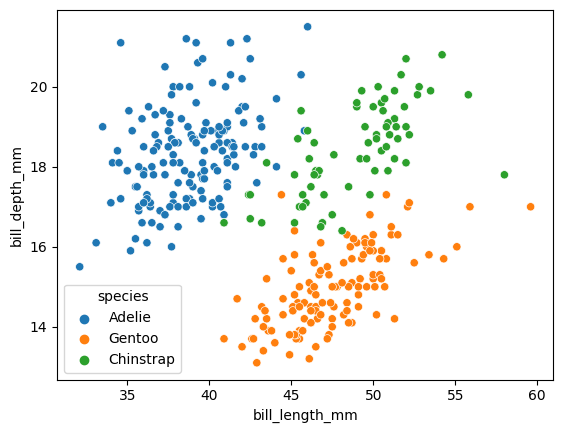

In [10]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')

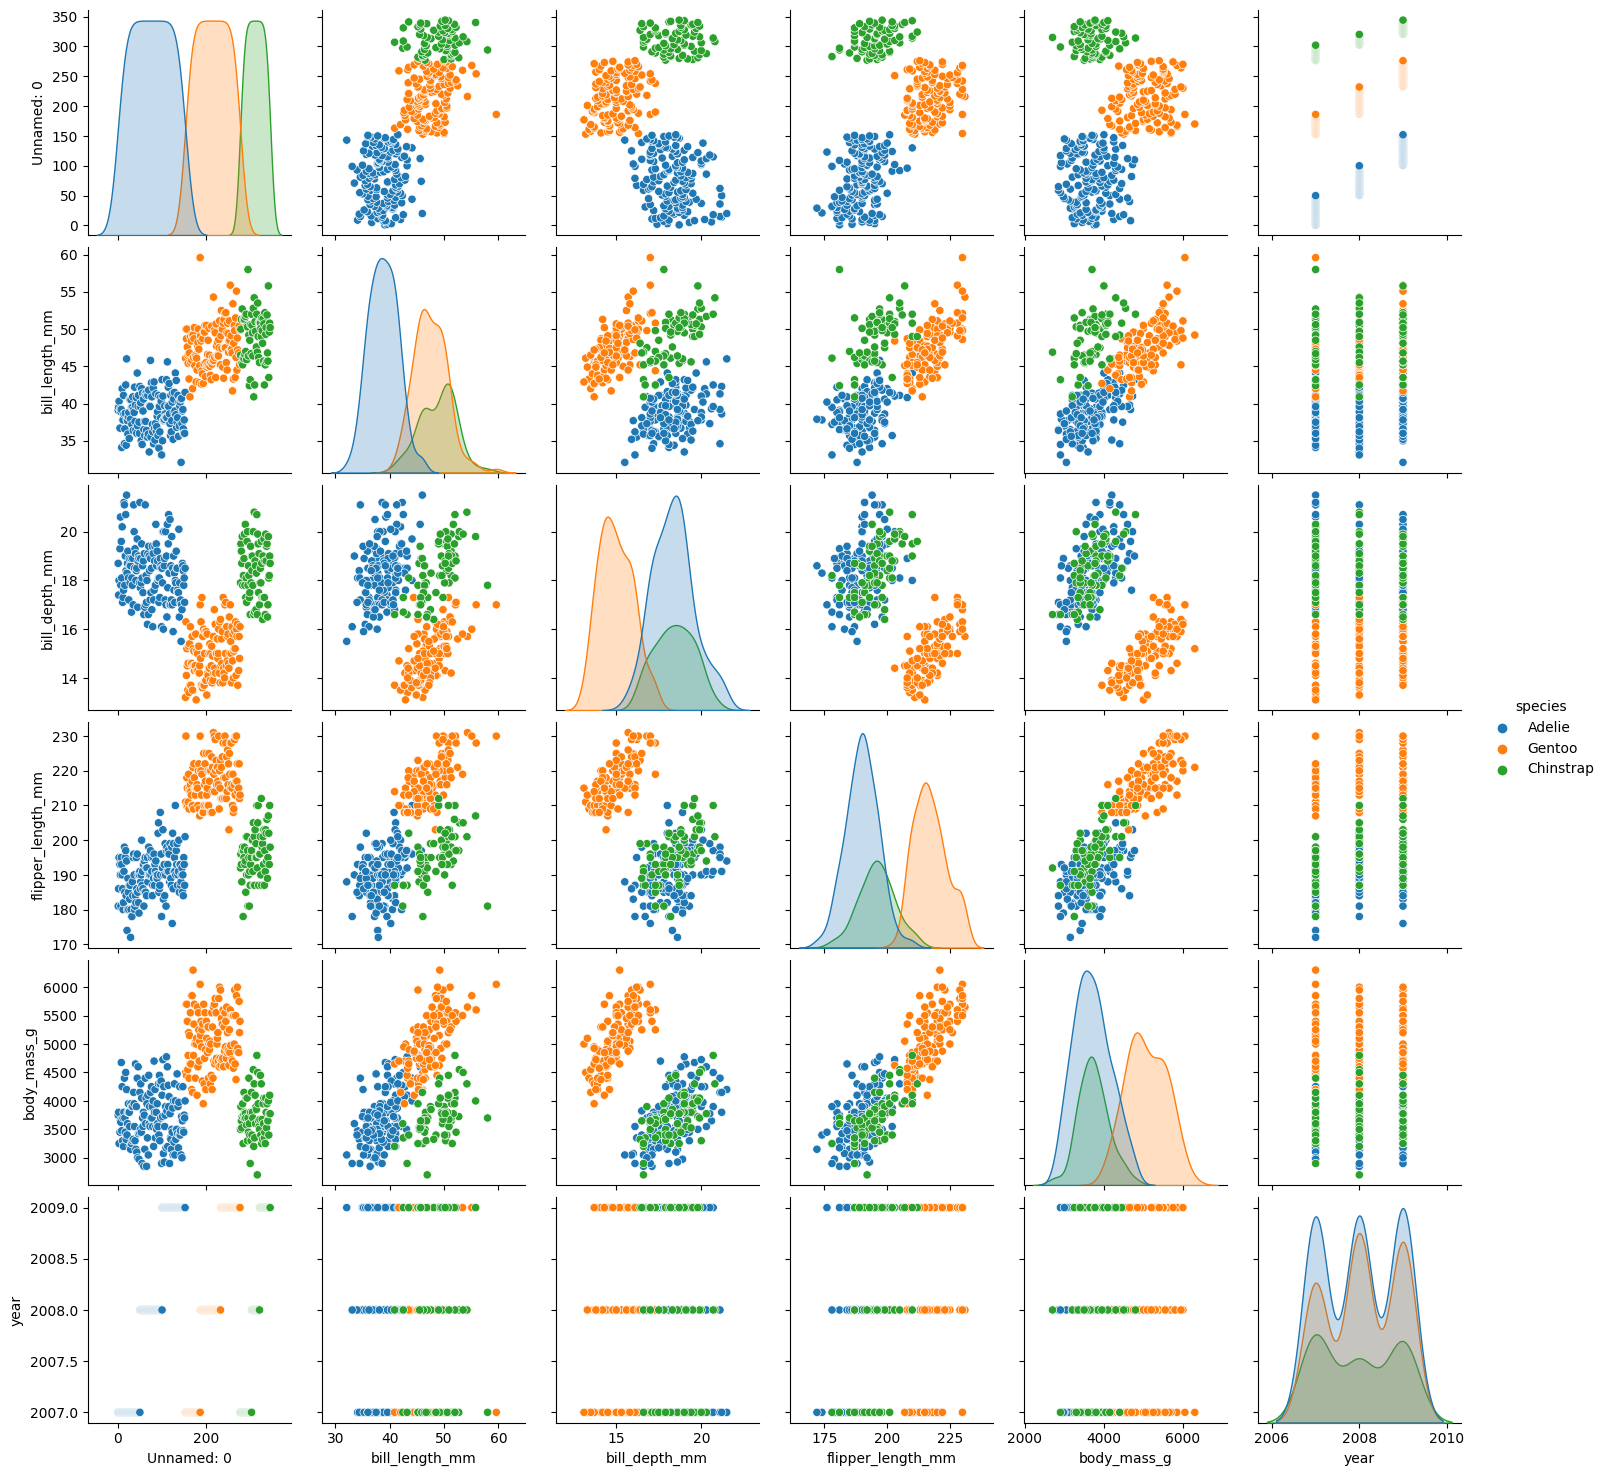

In [ ]:
sns.pairplot(data=df, hue='species')

Data Cleaning

In [ ]:
df.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace= True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace= True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace= True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace= True)

In [ ]:

df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
X=pd.get_dummies(df.drop(["Unnamed: 0","species"], axis=1),drop_first=True)
y=df['species']
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,39.10000,18.70000,181.000000,3750.000000,2007,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,2007,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,2007,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,2007,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,2007,0,1,0
...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,2009,1,0,1
340,43.50000,18.10000,202.000000,3400.000000,2009,1,0,0
341,49.60000,18.20000,193.000000,3775.000000,2009,1,0,1
342,50.80000,19.00000,210.000000,4100.000000,2009,1,0,1


train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [ ]:
Step 4,5 : Modeling and Evolution

SyntaxError: ignored

In [ ]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=6)
dtr.fit(X_train, y_train)

# Prediction
ytrain_pred = dtr.predict(X_train)
ytest_pred = dtr.predict(X_test)

#Evalution
from sklearn.metrics import accuracy_score
print("Trian Accuracy : ", accuracy_score(ytrain_pred,y_train))
print("Test Accuracy : ", accuracy_score(ytest_pred,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score : ", cross_val_score(dtr, X,y,cv=5).mean())

In [ ]:
#feature_name=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','year', 'island_Dream', 'island_Torgersen', 'sex_male']

#class_names = ['Adelie', 'Gentoo', 'Chinstrap']

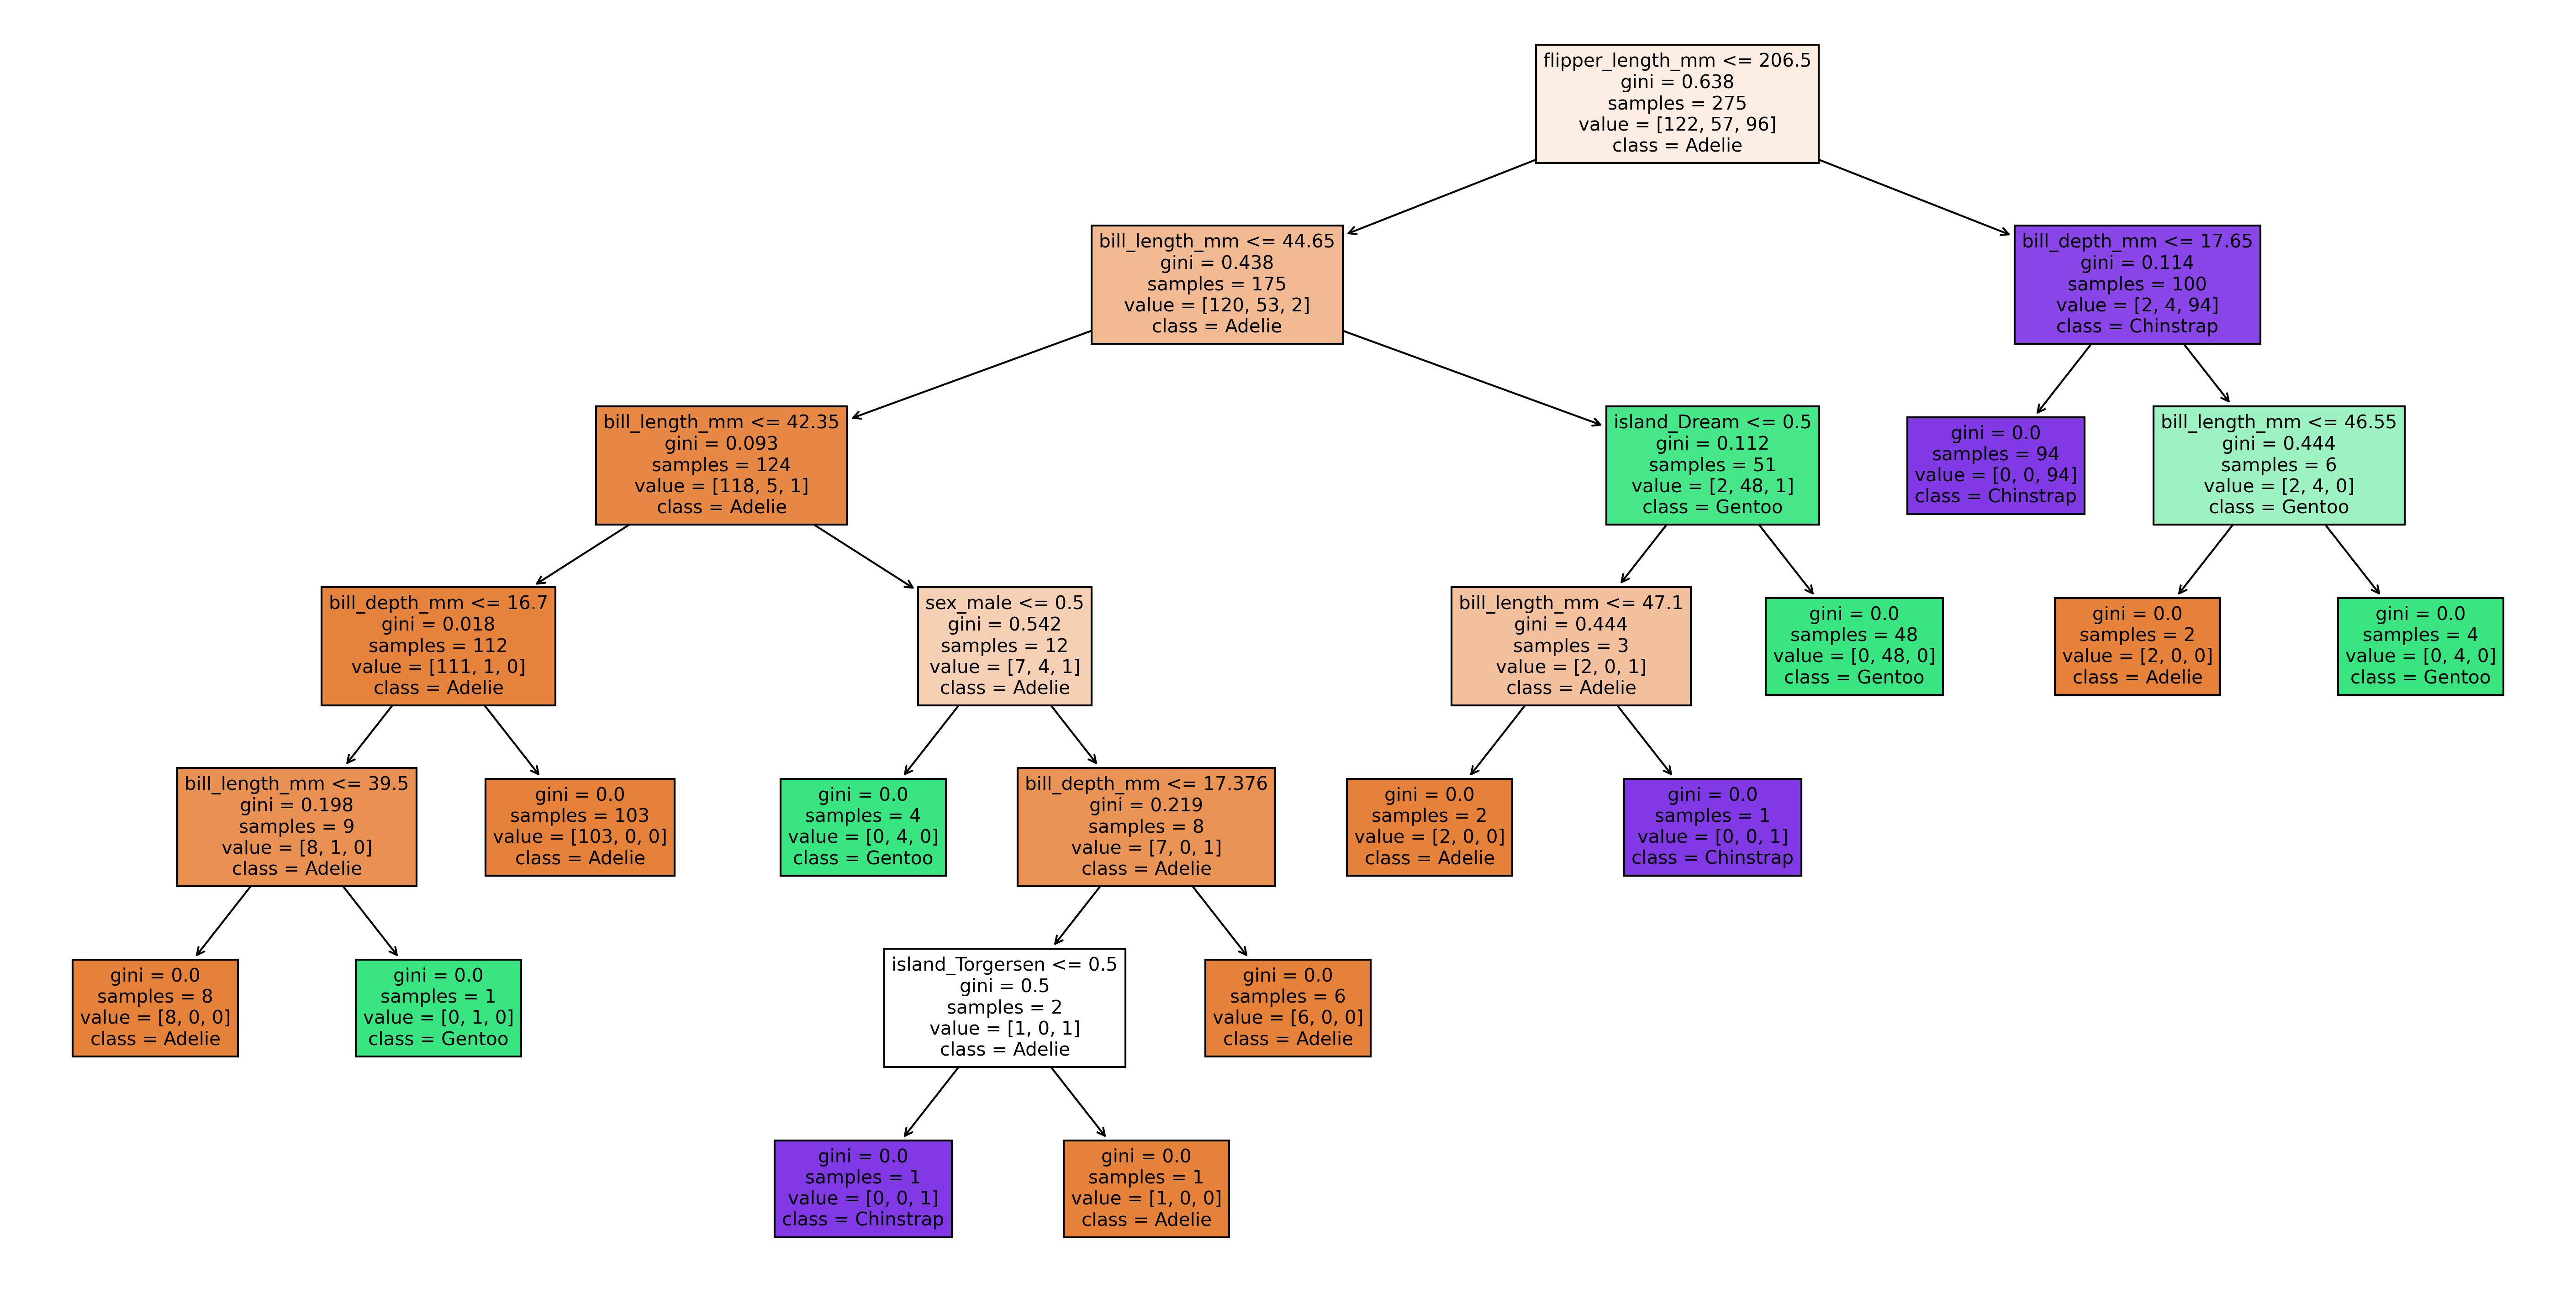

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)

plot_tree(dtr, filled=True, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year', 'island_Dream', 'island_Torgersen', 'sex_male'],class_names = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.show()

In [ ]:
dtr.predict([[50,20,200,4500,2017,1,0,0]])

array(['Chinstrap'], dtype=object)

HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = DecisionTreeClassifier(random_state=0)

#Parametr
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[1,2,3,4,5]}

grid = GridSearchCV(estimator,param_grid, scoring = 'accuracy',cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

Importance of each feature given by this model

In [ ]:
grid.best_estimator_.feature_importances_

array([0.38314042, 0.06336917, 0.50111456, 0.        , 0.        ,
       0.02516287, 0.        , 0.02721297])

In [ ]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Feature Importance'])

feats_imp = feats[feats['Feature Importance']>0]
imp_features_list = feats_imp.index.to_list()

print('-'*100)
print("feats_imp : ",feats_imp)
print('-'*100)
print("imp_features_list : ",imp_features_list)
print('-'*100)
print('feats',feats)
print('-'*100)

----------------------------------------------------------------------------------------------------
feats_imp :                     Feature Importance
bill_length_mm               0.383140
bill_depth_mm                0.063369
flipper_length_mm            0.501115
island_Dream                 0.025163
sex_male                     0.027213
----------------------------------------------------------------------------------------------------
imp_features_list :  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_Dream', 'sex_male']
----------------------------------------------------------------------------------------------------
feats                    Feature Importance
bill_length_mm               0.383140
bill_depth_mm                0.063369
flipper_length_mm            0.501115
body_mass_g                  0.000000
year                         0.000000
island_Dream                 0.025163
island_Torgersen             0.000000
sex_male                     0.027213
--

Final Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
#inpute with important featurs
X_imp = X[imp_features_list]

#train test split

X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size=0.2,random_state=6)

#model with best parameter
f_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
f_model.fit(X_train, y_train)

ypred_train = f_model.predict(X_train)
ypred_test = f_model.predict(X_test)

#Evaluation
print("Trian Accuracy : ", accuracy_score(ypred_train,y_train))
print("Test Accuracy : ", accuracy_score(ypred_test,y_test))
print("Cross Validation Score : ", cross_val_score(f_model, X_imp,y,cv=5).mean())


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

#Random Forest

- To control overfittion problem in decision tree is proning (cutting the tree)
- proning -----> cutting the tree